In [3]:
# load data
data = read.table("Atlanta Temperature data.txt",header=T)


Call:
lm(formula = temp ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.770 -11.886   0.514  13.418  22.942 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  61.4247     0.9841  62.420   <2e-16 ***
x1           -1.5723     4.5481  -0.346    0.730    
x2            3.4937     4.4062   0.793    0.428    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.36 on 1653 degrees of freedom
Multiple R-squared:  0.002098,	Adjusted R-squared:  0.0008903 
F-statistic: 1.737 on 2 and 1653 DF,  p-value: 0.1763


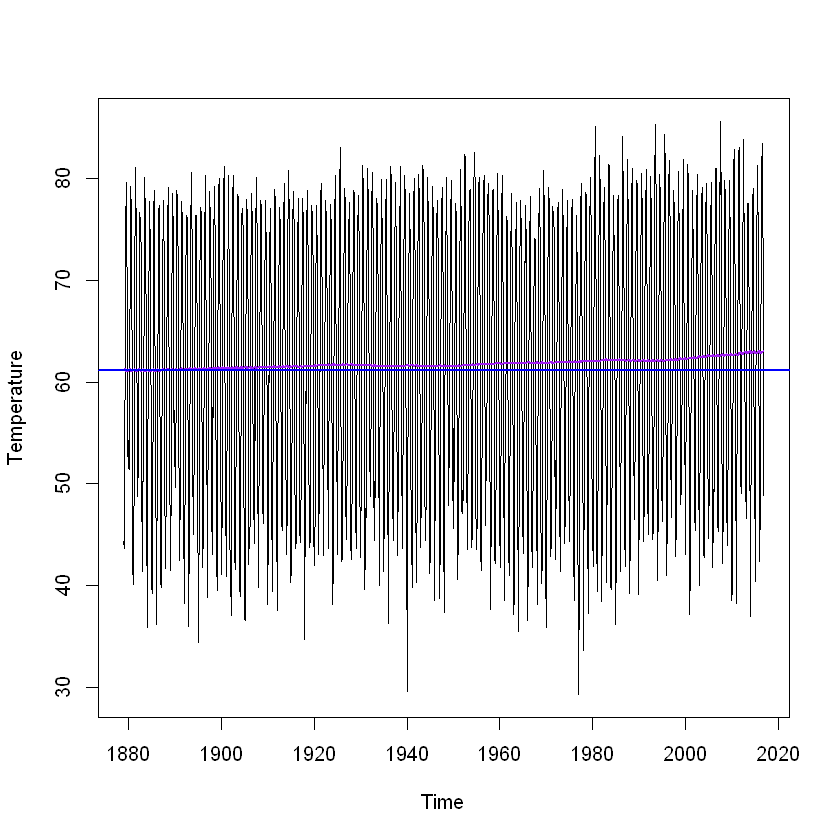

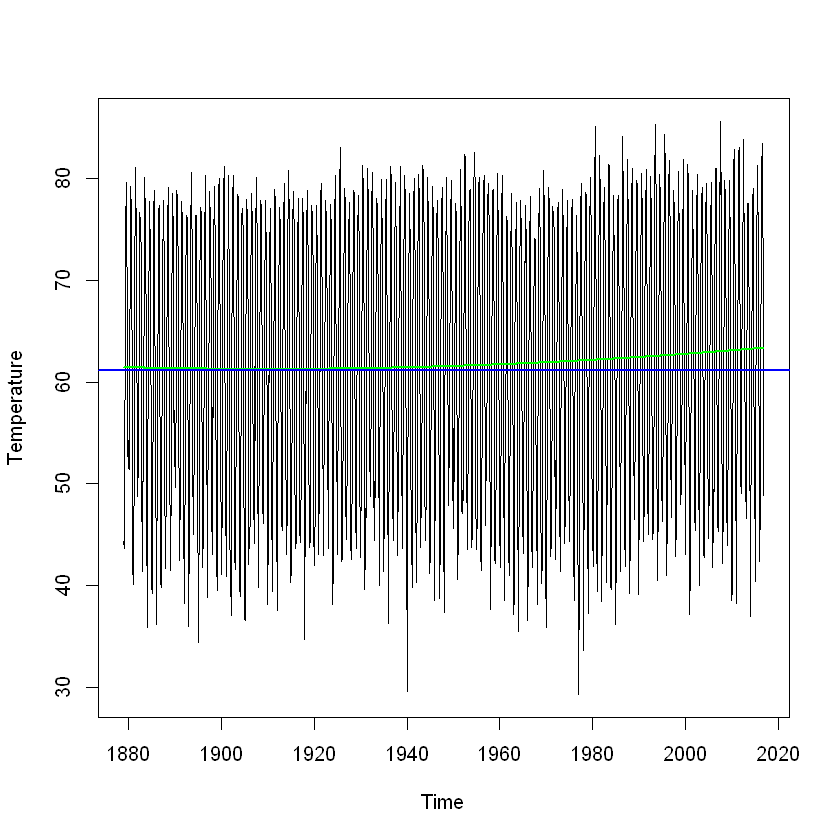

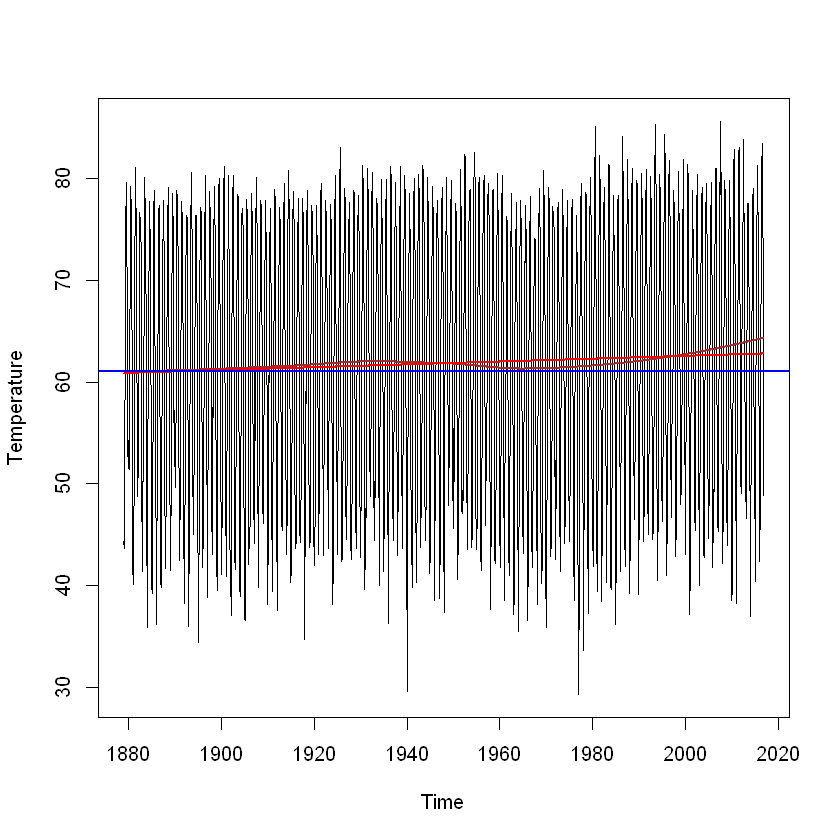

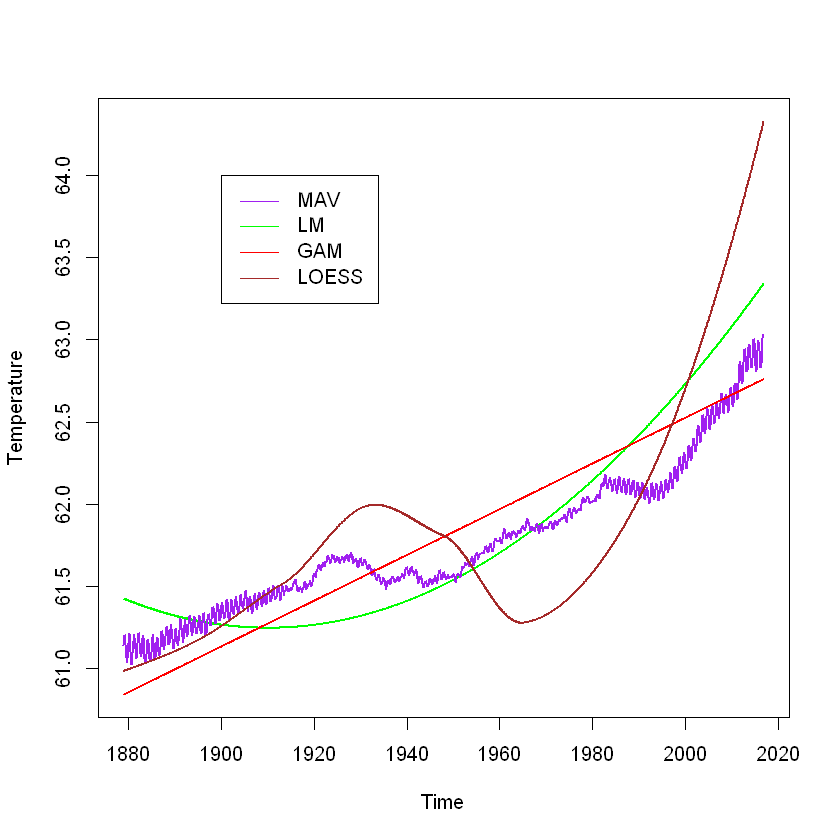

In [7]:
temp = as.vector(t(data[,-c(1,14)]))
temp = ts(temp,start=1879,frequency=12)
ts.plot(temp,ylab="Temperature")

############### TREND ESTIMATION ###################
## Is there a trend in the average temperature?
time.pts = c(1:length(temp))
time.pts = c(time.pts - min(time.pts))/max(time.pts)

## Fit a moving average 
mav.fit = ksmooth(time.pts, temp, kernel = "box")
temp.fit.mav = ts(mav.fit$y,start=1879,frequency=12)
ts.plot(temp,ylab="Temperature")
lines(temp.fit.mav,lwd=2,col="purple")
abline(temp.fit.mav[1],0,lwd=2,col="blue")

## Fit a parametric quadraric polynomial
x1 = time.pts
x2 = time.pts^2
lm.fit = lm(temp~x1+x2)
summary(lm.fit)
temp.fit.lm = ts(fitted(lm.fit),start=1879,frequency=12)
ts.plot(temp,ylab="Temperature")
lines(temp.fit.lm,lwd=2,col="green")
abline(temp.fit.mav[1],0,lwd=2,col="blue")

## Fit a trend using non-parametric regression
## Local Polynomial Trend Estimation
loc.fit = loess(temp~time.pts)
temp.fit.loc = ts(fitted(loc.fit),start=1879,frequency=12)
## Splines Trend Estimation
library(mgcv)
gam.fit = gam(temp~s(time.pts))
temp.fit.gam = ts(fitted(gam.fit),start=1879,frequency=12)
## Is there a trend? 
ts.plot(temp,ylab="Temperature")
lines(temp.fit.loc,lwd=2,col="brown")
lines(temp.fit.gam,lwd=2,col="red")
abline(temp.fit.loc[1],0,lwd=2,col="blue")

## Compare all estimated trends
all.val = c(temp.fit.mav,temp.fit.lm,temp.fit.gam,temp.fit.loc)
ylim= c(min(all.val),max(all.val))
ts.plot(temp.fit.lm,lwd=2,col="green",ylim=ylim,ylab="Temperature")
lines(temp.fit.mav,lwd=2,col="purple")
lines(temp.fit.gam,lwd=2,col="red")
lines(temp.fit.loc,lwd=2,col="brown")
legend(x=1900,y=64,legend=c("MAV","LM","GAM","LOESS"),lty = 1, col=c("purple","green","red","brown"))



In [9]:
################ SEASONALITY ESTIMATION #########################

library(TSA)

## Estimate seasonality using ANOVA approach
month = season(temp)
## Drop January (model with intercept)
model1 = lm(temp~month)
summary(model1)
## All seasonal mean effects (model without intercept)
model2 = lm(temp~month-1)
summary(model2)




Call:
lm(formula = temp ~ month)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9072  -1.9636  -0.0986   1.9437  12.5275 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     43.2072     0.2725 158.534  < 2e-16 ***
monthFebruary    2.7514     0.3854   7.139 1.41e-12 ***
monthMarch      10.0232     0.3854  26.005  < 2e-16 ***
monthApril      18.4014     0.3854  47.742  < 2e-16 ***
monthMay        26.5623     0.3854  68.916  < 2e-16 ***
monthJune       33.4913     0.3854  86.893  < 2e-16 ***
monthJuly       35.7978     0.3854  92.877  < 2e-16 ***
monthAugust     35.0630     0.3854  90.971  < 2e-16 ***
monthSeptember  30.0913     0.3854  78.071  < 2e-16 ***
monthOctober    19.7543     0.3854  51.252  < 2e-16 ***
monthNovember    9.3420     0.3854  24.238  < 2e-16 ***
monthDecember    1.8652     0.3854   4.839 1.43e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.202 on 1644 degrees of f


Call:
lm(formula = temp ~ month - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9072  -1.9636  -0.0986   1.9437  12.5275 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
monthJanuary    43.2072     0.2725   158.5   <2e-16 ***
monthFebruary   45.9587     0.2725   168.6   <2e-16 ***
monthMarch      53.2304     0.2725   195.3   <2e-16 ***
monthApril      61.6087     0.2725   226.1   <2e-16 ***
monthMay        69.7696     0.2725   256.0   <2e-16 ***
monthJune       76.6986     0.2725   281.4   <2e-16 ***
monthJuly       79.0051     0.2725   289.9   <2e-16 ***
monthAugust     78.2703     0.2725   287.2   <2e-16 ***
monthSeptember  73.2986     0.2725   268.9   <2e-16 ***
monthOctober    62.9616     0.2725   231.0   <2e-16 ***
monthNovember   52.5493     0.2725   192.8   <2e-16 ***
monthDecember   45.0725     0.2725   165.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.202 on 1644 degrees 

In [10]:
## Estimate seasonality using cos-sin model
har=harmonic(temp,1)
model3=lm(temp~har)
summary(model3)
har2=harmonic(temp,2)
model4=lm(temp~har2)
summary(model4)


Call:
lm(formula = temp ~ har)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2003  -2.0059  -0.2022   2.0005  12.4493 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     61.80254    0.08133  759.870  < 2e-16 ***
harcos(2*pi*t) -18.30228    0.11502 -159.119  < 2e-16 ***
harsin(2*pi*t)  -0.69366    0.11502   -6.031 2.01e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.31 on 1653 degrees of freedom
Multiple R-squared:  0.9388,	Adjusted R-squared:  0.9387 
F-statistic: 1.268e+04 on 2 and 1653 DF,  p-value: < 2.2e-16



Call:
lm(formula = temp ~ har2)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5699  -2.0031  -0.1105   1.9524  12.5301 

Coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      61.80254    0.07888  783.490  < 2e-16 ***
har2cos(2*pi*t) -18.30228    0.11155 -164.065  < 2e-16 ***
har2cos(4*pi*t)  -0.63031    0.11155   -5.650 1.88e-08 ***
har2sin(2*pi*t)  -0.69366    0.11155   -6.218 6.36e-10 ***
har2sin(4*pi*t)   0.96246    0.11155    8.628  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.21 on 1651 degrees of freedom
Multiple R-squared:  0.9425,	Adjusted R-squared:  0.9424 
F-statistic:  6766 on 4 and 1651 DF,  p-value: < 2.2e-16


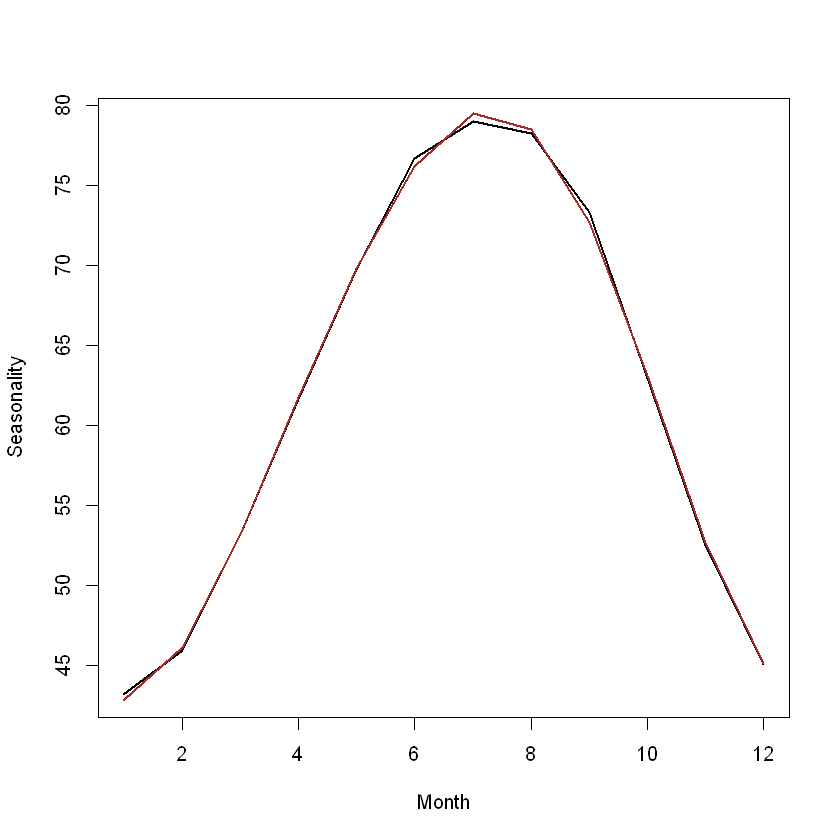

In [11]:
## Compare Seasonality Estimates
## Seasonal Means Model
st1 = coef(model2)
## Cos-Sin Model
st2 = fitted(model4)[1:12]
plot(1:12,st1,lwd=2,type="l",xlab="Month",ylab="Seasonality")
lines(1:12,st2,lwd=2, col="brown")


Call:
lm(formula = temp ~ x1 + x2 + har2)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8242  -1.9505  -0.1554   1.9744  12.7916 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      61.4620     0.2324  264.456  < 2e-16 ***
x1               -1.6526     1.0741   -1.538 0.124119    
x2                3.5021     1.0406    3.365 0.000782 ***
har2cos(2*pi*t) -18.3012     0.1097 -166.844  < 2e-16 ***
har2cos(4*pi*t)  -0.6292     0.1097   -5.736 1.15e-08 ***
har2sin(2*pi*t)  -0.6895     0.1097   -6.286 4.17e-10 ***
har2sin(4*pi*t)   0.9644     0.1097    8.792  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.156 on 1649 degrees of freedom
Multiple R-squared:  0.9445,	Adjusted R-squared:  0.9443 
F-statistic:  4675 on 6 and 1649 DF,  p-value: < 2.2e-16


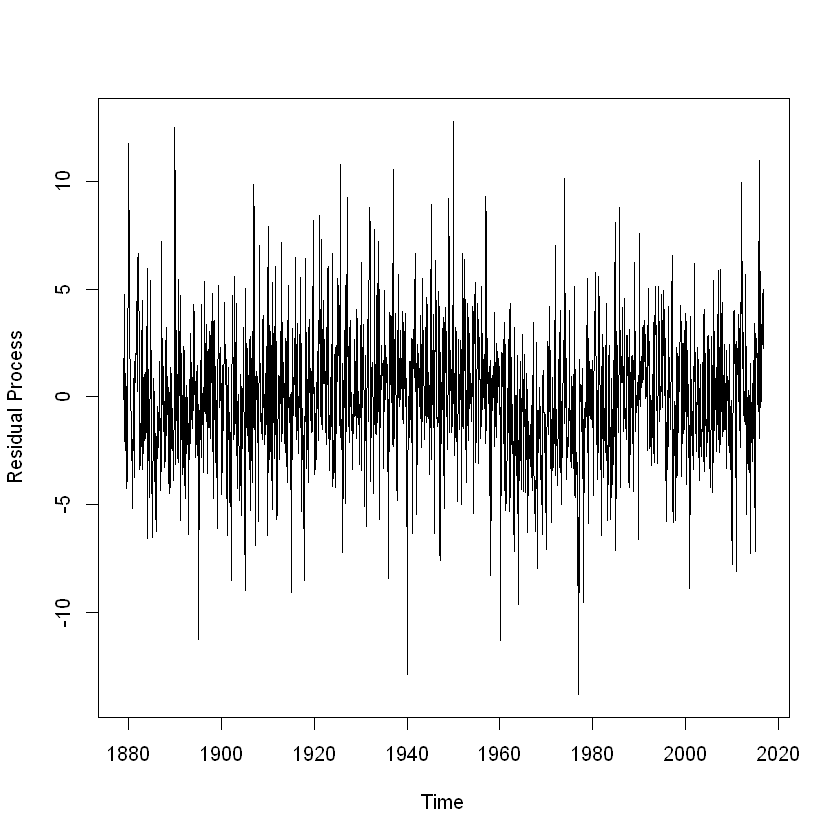

In [12]:

################ TREND AND SEASONALITY ESTIMATION #########################
## Using linear regression

## Fit a parametric model for both trend and seasonality
x1 = time.pts
x2 = time.pts^2
har2=harmonic(temp,2)
lm.fit = lm(temp~x1+x2+har2)
summary(lm.fit)
dif.fit.lm = ts((temp-fitted(lm.fit)),start=1879,frequency=12)
ts.plot(dif.fit.lm,ylab="Residual Process")

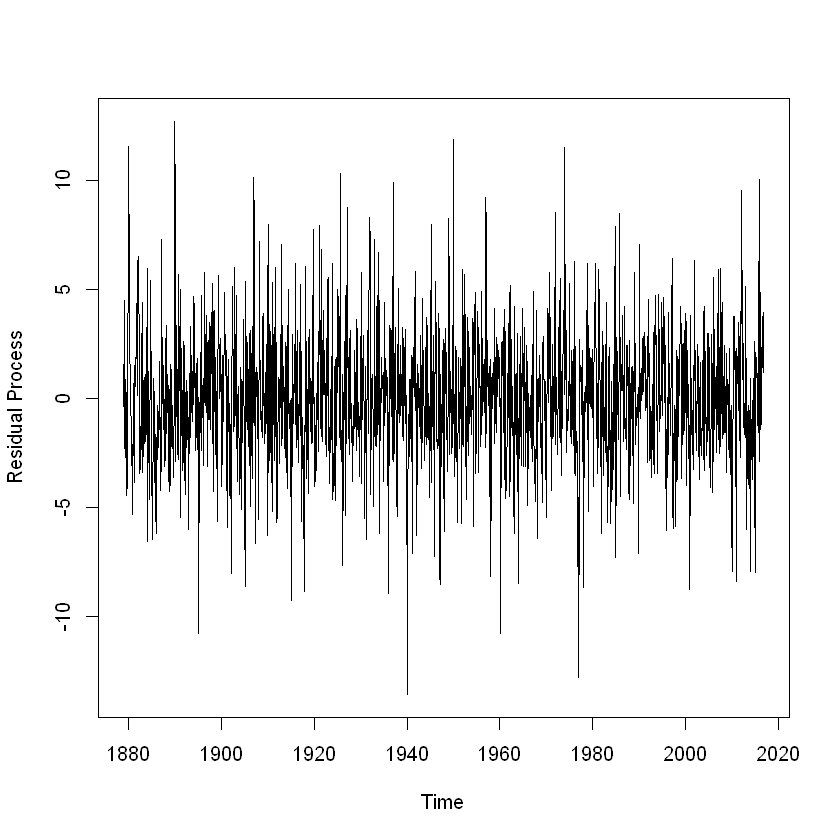

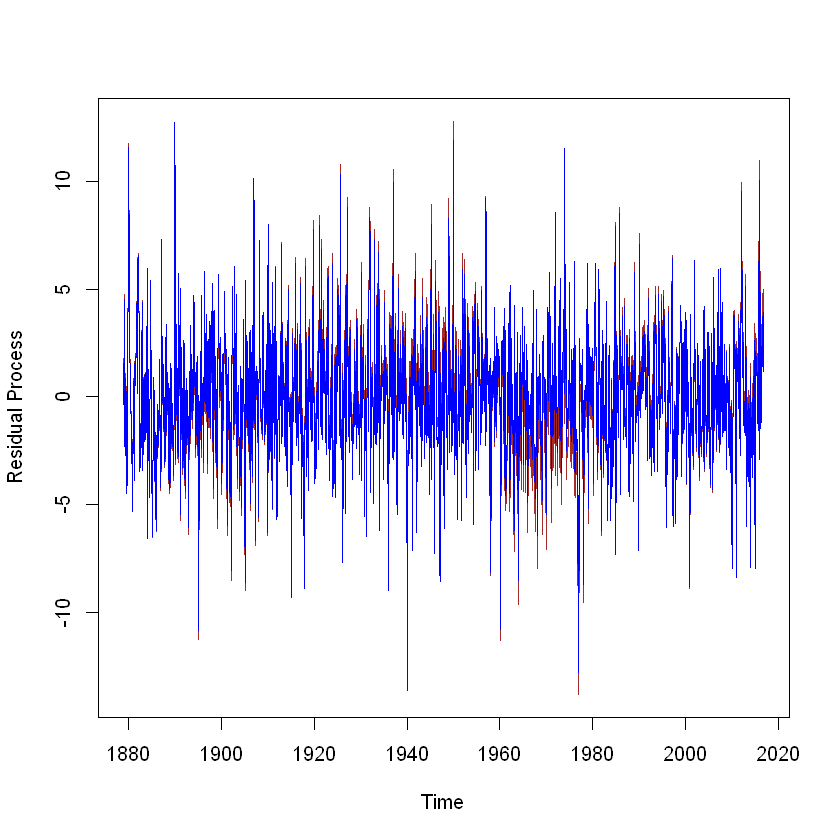

In [13]:

## Fit a non-parametric model for trend and linear model for seasonality
gam.fit = gam(temp~s(time.pts)+har2)
dif.fit.gam = ts((temp-fitted(gam.fit)),start=1879,frequency=12)
ts.plot(dif.fit.gam,ylab="Residual Process")

## Compare approaches 
ts.plot(dif.fit.lm,ylab="Residual Process",col="brown")
lines(dif.fit.gam,col="blue")

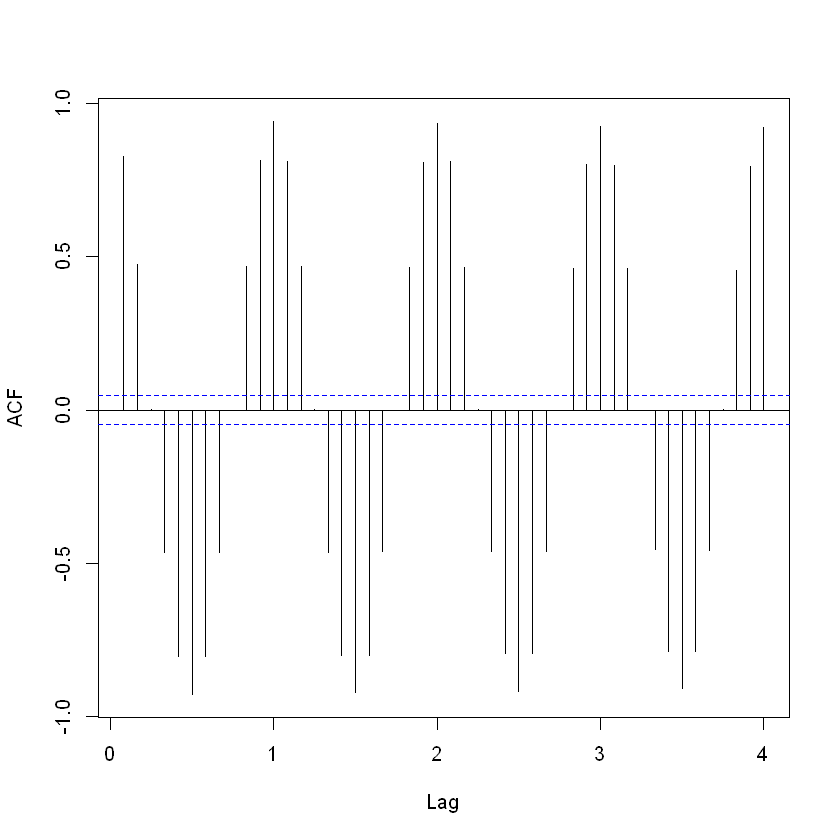

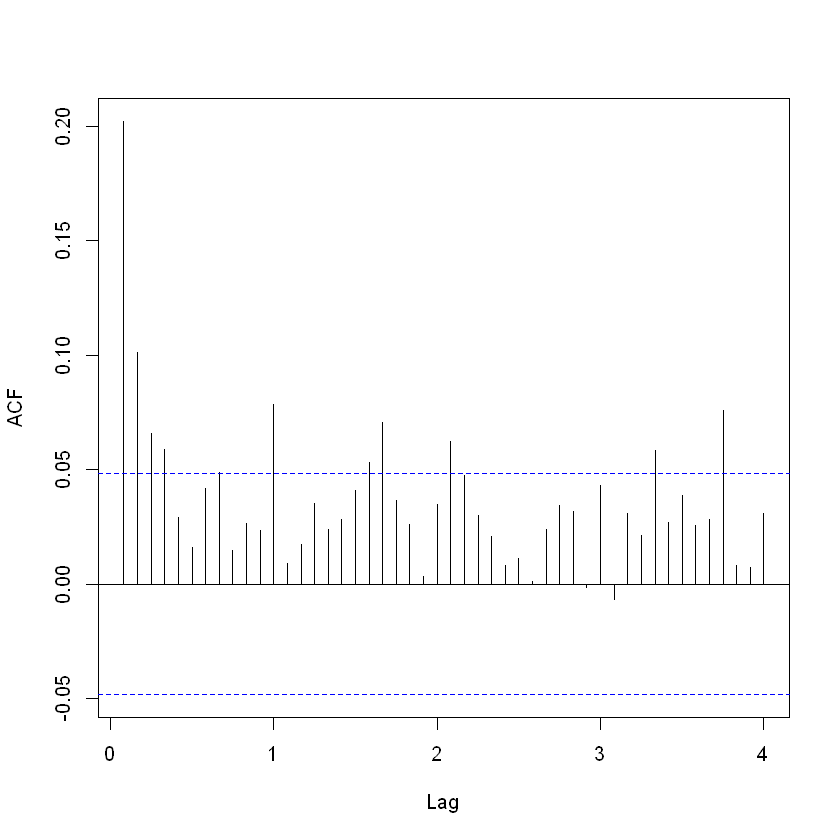

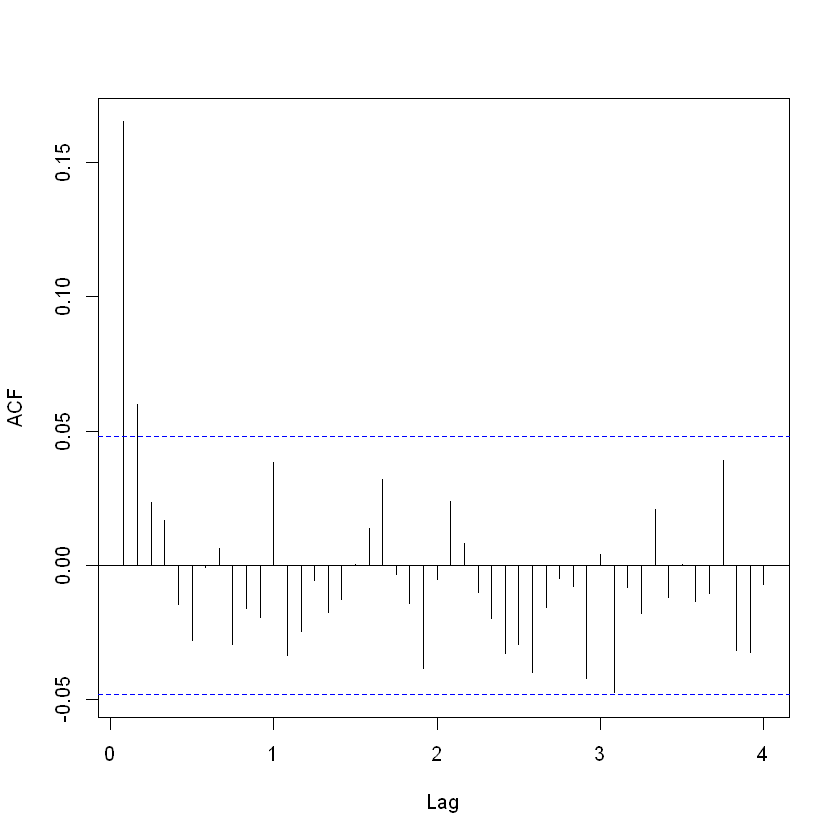

In [15]:
## Sample Autocorrelation Functions 
## ACF for the temperature time series
acf(temp,lag.max=12*4,main="")
## ACF for the residual process
acf(dif.fit.lm,lag.max=12*4,main="")
acf(dif.fit.gam,lag.max=12*4,main="")
